In [192]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [237]:
# Import csv and convert 'Date' column to datetime, and set as index
df = pd.read_csv('prices.csv', parse_dates=['Date'], index_col=['Date'])

In [225]:
# Filter to price & quantity of similar items.
df = df.filter(items=['Date', 'Regulus Price', 'Regulus Quantity Listed', 'Bast Price', 'Bast Quantity Listed', 'Wood Price', 'Wood Quantity Listed', 'Ochre Price', 'Ochre Quantity Listed', 'Resin Price', 'Resin Quantity Listed', 'Rune Price', 'Rune Quantity Listed'])
# Remove missing values
df = df.dropna()
# Separate by years to remove large gaps
df2020 = df.loc['2020':'2021']
df2022 = df.loc['2022':]

In [240]:
# Descriptive statistics
df_desc = df.describe()
df_desc = df_desc.round(1)
display(df_desc)

,Regulus Suggested Low,Regulus Suggested High,Regulus Price,Regulus Listings,Regulus Quantity Listed,Regulus Avg. Listing Size,Bast Suggested Low,Bast Suggested High,Bast Price,Bast Listings,...,Wax Price,Wax Listings,Wax Quantity Listed,Wax Avg. Listing Size,Pelt Suggested Low,Pelt Suggested High,Pelt Price,Pelt Listings,Pelt Quantity Listed,Pelt Avg. Listing Size
count,75.0,75.0,75.0,66.0,66.0,66.0,75.0,75.0,75.0,66.0,...,75.0,66.0,66.0,66.0,38.0,38.0,38.0,11.0,11.0,11.0
mean,42.8,53.6,48.5,1739.6,198779.7,118.8,37.7,47.2,42.8,1496.9,...,554.3,2891.0,128782.6,44.8,8.5,10.5,9.7,530.5,48166.7,90.7
std,18.3,22.8,20.6,766.7,57368.3,14.2,20.9,26.1,23.5,774.4,...,167.4,261.3,14036.9,5.7,2.1,2.7,2.4,22.2,4821.2,7.8
min,10.0,13.0,12.0,1055.0,126837.0,77.0,12.0,15.0,14.0,923.0,...,277.0,2166.0,99654.0,35.0,5.0,6.0,6.0,508.0,41895.0,82.0
25%,25.0,31.0,28.0,1267.2,152954.5,110.0,24.0,30.5,27.5,1117.5,...,433.0,2742.0,120373.8,42.0,7.2,9.2,8.2,516.0,44171.0,84.0
50%,52.0,65.0,59.0,1546.5,197141.5,124.5,34.0,43.0,39.0,1232.0,...,477.0,2854.5,129054.5,45.0,9.0,11.0,10.0,521.0,47726.0,89.0
75%,55.0,69.0,62.0,1786.0,212001.2,128.0,35.5,44.5,40.5,1407.5,...,725.5,3119.8,139137.8,47.8,9.8,12.0,11.0,541.5,51429.0,98.5
max,75.0,94.0,85.0,4617.0,385365.0,142.0,95.0,119.0,107.0,4682.0,...,791.0,3399.0,153381.0,65.0,13.0,16.0,15.0,577.0,55416.0,102.0


In [227]:
# Find difference between rows
df2020_diff = df2020.diff()
df2022_diff = df2022.diff()

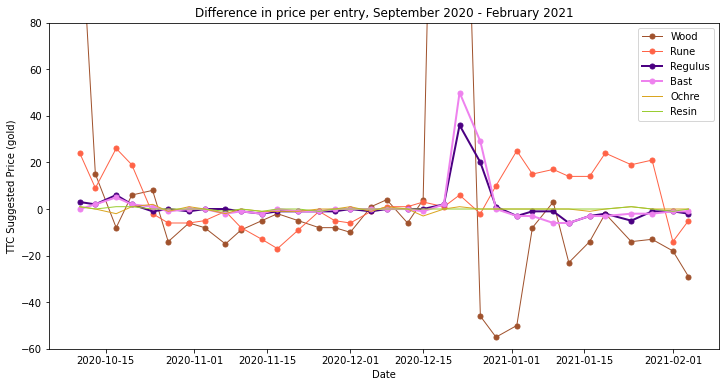

In [228]:
# Create line graph of price increases per entry for 2020-21 
plt.plot(df2020_diff['Wood Price'], label='Wood', linewidth=1, marker='.', markersize=10, color='sienna')
plt.plot(df2020_diff['Rune Price'], label='Rune', linewidth=1, marker='.', markersize=10, color='tomato')
plt.plot(df2020_diff['Regulus Price'], label='Regulus', linewidth=2, marker='.', markersize=10, color='indigo')
plt.plot(df2020_diff['Bast Price'], label='Bast', linewidth=2, marker='.', markersize=10, color='violet')
plt.plot(df2020_diff['Ochre Price'], label='Ochre', linewidth=1, color='goldenrod')
plt.plot(df2020_diff['Resin Price'], label='Resin', linewidth=1, color='yellowgreen')
plt.ylabel('TTC Suggested Price (gold)')
plt.xlabel('Date')
plt.title('Difference in price per entry, September 2020 - February 2021')
plt.legend(loc="upper right")
plt.ylim(-60, 80)
plt.gcf().set_size_inches(12,6)
plt.show()

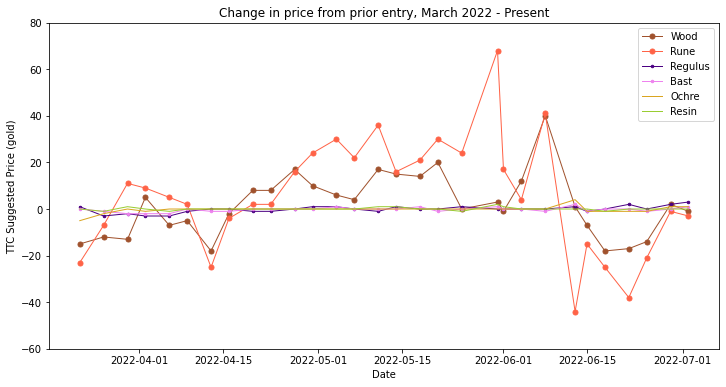

In [229]:
# Create line graph of price increases per entry for 2022 
plt.plot(df2022_diff['Wood Price'], label='Wood', linewidth=1, marker='.', markersize=10, color='sienna')
plt.plot(df2022_diff['Rune Price'], label='Rune', linewidth=1, marker='.', markersize=10, color='tomato')
plt.plot(df2022_diff['Regulus Price'], label='Regulus', linewidth=1, marker='.', markersize=5, color='indigo')
plt.plot(df2022_diff['Bast Price'], label='Bast', linewidth=1, marker='.', markersize=5, color='violet')
plt.plot(df2022_diff['Ochre Price'], label='Ochre', linewidth=1, color='goldenrod')
plt.plot(df2022_diff['Resin Price'], label='Resin', linewidth=1, color='yellowgreen')
plt.ylabel('TTC Suggested Price (gold)')
plt.xlabel('Date')
plt.title('Change in price from prior entry, March 2022 - Present')
plt.legend(loc="upper right")
plt.ylim(-60, 80)
plt.gcf().set_size_inches(12,6)
plt.show()

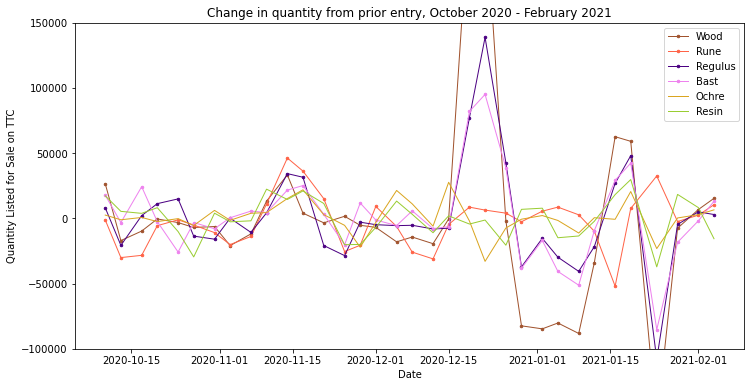

In [232]:
# Create line graph of quantity for sale increases/decreases per entry for 2020-21
plt.plot(df2020_diff['Wood Quantity Listed'], label='Wood', linewidth=1, marker='.', markersize=5, color='sienna')
plt.plot(df2020_diff['Rune Quantity Listed'], label='Rune', linewidth=1, marker='.', markersize=5, color='tomato')
plt.plot(df2020_diff['Regulus Quantity Listed'], label='Regulus', linewidth=1, marker='.', markersize=5, color='indigo')
plt.plot(df2020_diff['Bast Quantity Listed'], label='Bast', linewidth=1, marker='.', markersize=5, color='violet')
plt.plot(df2020_diff['Ochre Quantity Listed'], label='Ochre', linewidth=1, color='goldenrod')
plt.plot(df2020_diff['Resin Quantity Listed'], label='Resin', linewidth=1, color='yellowgreen')
plt.ylabel('Quantity Listed for Sale on TTC')
plt.xlabel('Date')
plt.title('Change in quantity from prior entry, October 2020 - February 2021')
plt.legend(loc="upper right")
plt.ylim(-100000, 150000)
plt.gcf().set_size_inches(12, 6)
plt.show()

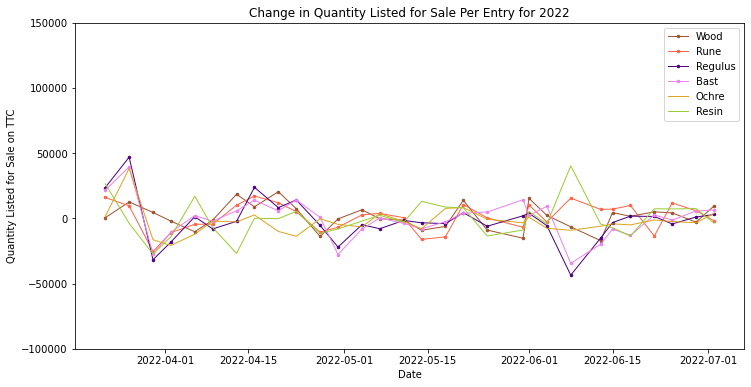

In [233]:
# Create line graph of quantity for sale increases/decreases per entry for 2022
plt.plot(df2022_diff['Wood Quantity Listed'], label='Wood', linewidth=1, marker='.', markersize=5, color='sienna')
plt.plot(df2022_diff['Rune Quantity Listed'], label='Rune', linewidth=1, marker='.', markersize=5, color='tomato')
plt.plot(df2022_diff['Regulus Quantity Listed'], label='Regulus', linewidth=1, marker='.', markersize=5, color='indigo')
plt.plot(df2022_diff['Bast Quantity Listed'], label='Bast', linewidth=1, marker='.', markersize=5, color='violet')
plt.plot(df2022_diff['Ochre Quantity Listed'], label='Ochre', linewidth=1, color='goldenrod')
plt.plot(df2022_diff['Resin Quantity Listed'], label='Resin', linewidth=1, color='yellowgreen')
plt.ylabel('Quantity Listed for Sale on TTC')
plt.xlabel('Date')
plt.title('Change in Quantity Listed for Sale Per Entry for 2022')
plt.legend(loc="upper right")
plt.ylim(-100000, 150000)
plt.gcf().set_size_inches(12, 6)
plt.show()